In [164]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
df_train = pd.read_excel('flight_data_train.xlsx')
df_test = pd.read_excel('flight_data_Test.xlsx')

In [166]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [167]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [168]:
#Checking the shape of train and test data
print('Train_data:',df_train.shape)
print('Test_data:',df_test.shape)

Train_data: (10683, 11)
Test_data: (2671, 10)


Reamark: Its generally a good idea to combine both train and test data sets into one, perform feature engineering and then divide them later again. This saves the trouble of performing the same steps twice on test and train

In [169]:
df=df_train.append(df_test, ignore_index=True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [170]:
#Checking the shape
print (df_train.shape, df_test.shape, df.shape )

(10683, 11) (2671, 10) (13354, 11)


In [171]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [172]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


Observation:

1. Note that the price is the target variable and missing values are ones in the test set.
2. One row with missing values in Route and Total_Stops.
3. Only Price is float value, all others are string and need to be converted later accoding to fetures value.

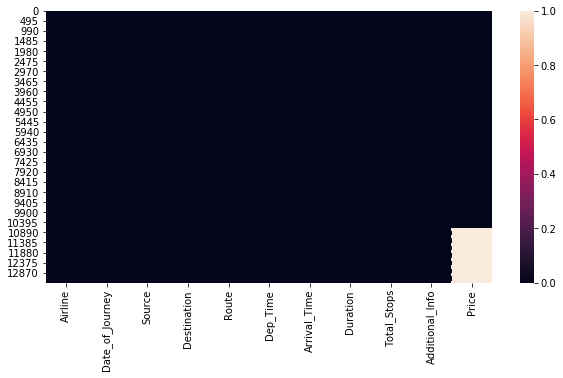

In [174]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

In [175]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [176]:
# Lets treat the null value
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [177]:
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [178]:
# Only one row 9039 null in route and Totl_stops so its drop
df.drop(index=9039, axis=0, inplace=True)
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [179]:
#After drop index 9039 check null value
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [180]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


findings: Price has lot of outliers

In [181]:
###Exploring data variable
for i in df.columns:
    print(i)
    print('# of unique values -->', df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('___________________________________')

Airline
# of unique values --> 12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
___________________________________
Date_of_Journey
# of unique values --> 44
count          13353
unique            44
top       18/05/2019
freq             633
Name: Date_of_Journey, dtype: object
___________________________________
Source
# of unique values --> 5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
___________________________________
Destination
# of unique values --> 6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
___________________________________
Route
# of unique values --> 132
count               13353
unique                132
top       DEL → BOM → COK
freq                 3000
Name: Route, dtype: object
___________________________________
Dep_Time
# of unique values --> 223
count     13353
unique      223
top       18:55

In [182]:
#Data Cleaning - 'Date_of_Journey', 'Dep_Time', 'Arrival_Time'
# Since year for 'Date_of_Journey' is the same, we don't need it.
df['Journey_Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Journey_Date'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Date_of_Journey'].str.split('/').str[2].unique()
df.drop(columns=['Date_of_Journey'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,3,1


In [183]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '00:20 07 Mar',
       '00:20 02 Apr', '07:45 13 May'], dtype=object)

In [184]:
# Since year for 'Date_of_Journey' is the same, we don't need it.

df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_Min'] = df['Arrival_Time'].str.split(':').str[1].astype(int)
df.drop(columns=['Arrival_Time'], axis=1, inplace=True)

In [185]:
df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [186]:
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1].astype(int)
df.drop(columns=['Dep_Time'], axis=1, inplace=True)

In [187]:
#Data Cleaning - Airline
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [188]:
#Data Cleaning - Destination
df['Destination'].value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [189]:
#Data Cleaning - Source
df['Source'].value_counts()

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [190]:
#Data Cleaning - Total_Stops
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [191]:
# We can convert this data to numeric values {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [192]:
#Data Cleaning - Route
data = df['Route'].str.split(' → ', expand=True)
lst = ['Route0', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5']
data.columns = lst
data.fillna('None', inplace=True)
df = pd.concat([df, data], axis=1)
df.drop(columns=['Route'], axis=1, inplace=True)

In [193]:
# Since we have 'Source' in the dataset, we can remove 'Route0' which is the same as 'Source'.
df.drop(columns=['Route0'], axis=1, inplace=True)

In [194]:
# We can split hours and minutes from Duration

df['Duration_Hrs'] = df['Duration'].str.split('h').str[0].str.strip()
data['Duration_Min'] = df['Duration'].str.split('h').str[1].str.strip()
df['Duration_Min'] = data['Duration_Min'].str.split('m').str[0].str.strip()

df.drop(columns=['Duration'], axis=1, inplace=True)

In [195]:
df['Duration_Hrs'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [196]:
df['Duration_Min'].unique()

array(['50', '25', '', '45', '30', '5', '15', '35', '10', '20', '55',
       '40', nan], dtype=object)

In [197]:
# It is not possible to travel from Mumbai to Hyderabad in 5 minutes. We are going to drop those rows.
df.drop(axis=0, index=df[df['Duration_Hrs']=='5m'].index, inplace=True)

In [198]:
# Replacing all unknown values to 0
val = list(df[df['Duration_Min']==df['Duration_Min'][2]].index)
for i in val:
    df['Duration_Min'][i] = 0

In [199]:
#Convert to numerical value
df['Duration_Hrs'] = df['Duration_Hrs'].astype(int)
df['Duration_Min'] = df['Duration_Min'].astype(int)

In [200]:
#Data Cleaning - Additional_Info
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [201]:
# We can replace 'No info' and 'No Info' as 'No_Info'.
df['Additional_Info'].replace({'No info':'No_Info', 'No Info':'No_Info'}, inplace=True)

In [202]:
df['Additional_Info'].value_counts()

No_Info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

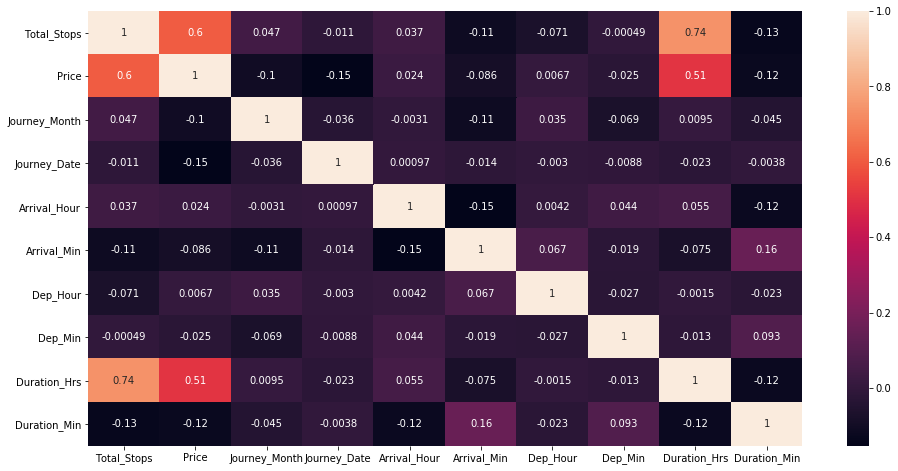

In [203]:
#After converted features with value check coorealtion
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

Observation:

1. Total_Stops and Price are postive coorelated.
2. Total_Stops higly positive correlated with Duration_Hrs and negative correlated with Duration_Min.
3. Price is postive correlated with Duration_Hrs.

In [204]:
#seprate the categorical columns and numerical columns
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print('Total Number of Features', df.shape[1])
print('Number of Categorical Features', len(cat_df))
print('Number of Numerical Features', len(num_df))

Total Number of Features 19
Number of Categorical Features 9
Number of Numerical Features 10


Skewness of Total_Stops = 0.32
Skewness of Price = 1.81
Skewness of Journey_Month = -0.39
Skewness of Journey_Date = 0.13
Skewness of Arrival_Hour = -0.38
Skewness of Arrival_Min = 0.11
Skewness of Dep_Hour = 0.11
Skewness of Dep_Min = 0.16
Skewness of Duration_Hrs = 0.86
Skewness of Duration_Min = -0.09


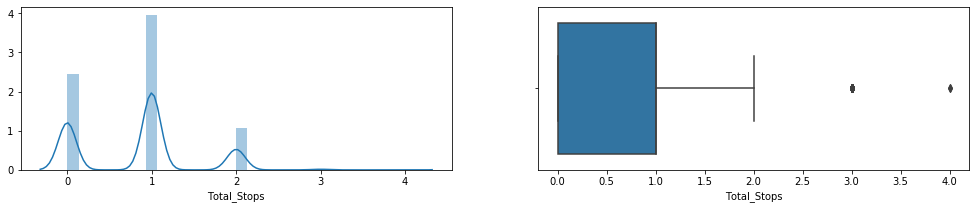

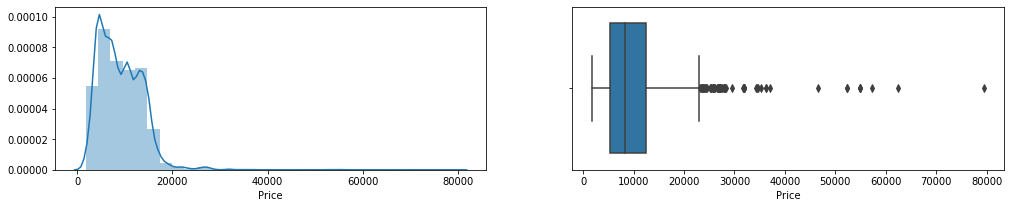

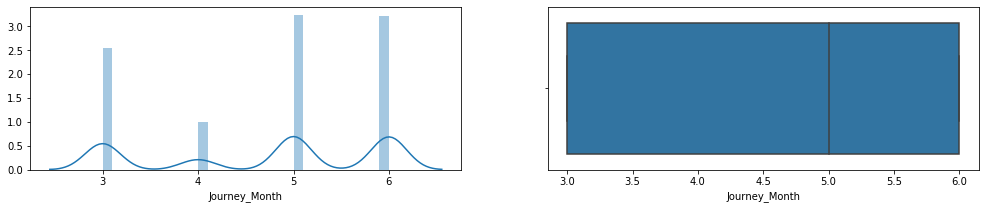

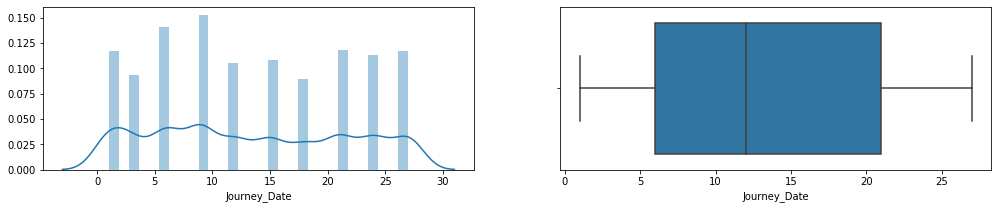

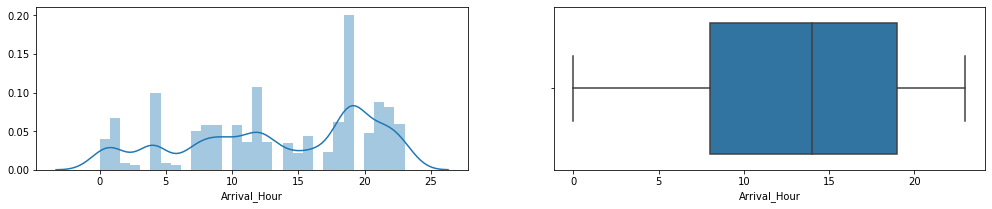

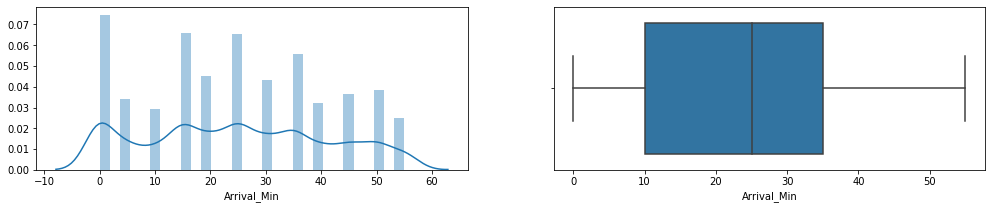

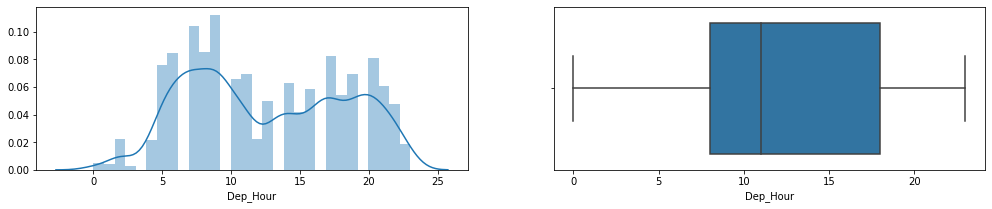

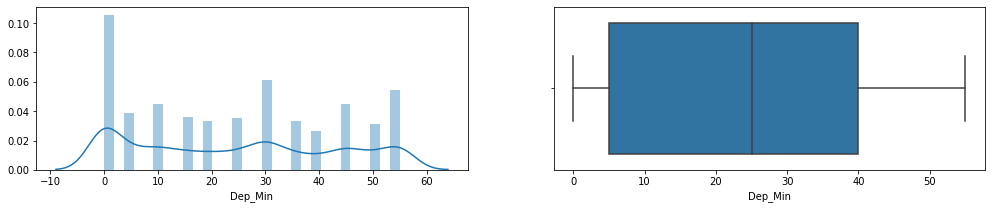

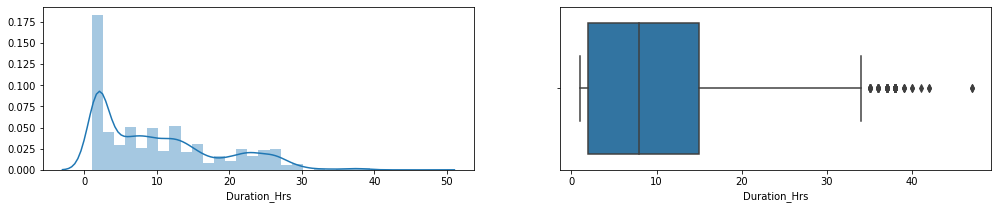

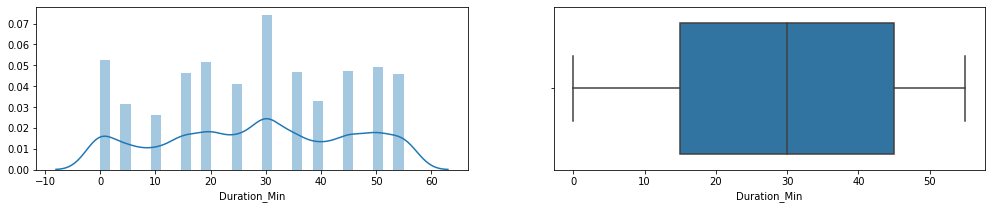

In [205]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

findings: 
    
    1) some variables have outliers
    2) very few variables are skewed.

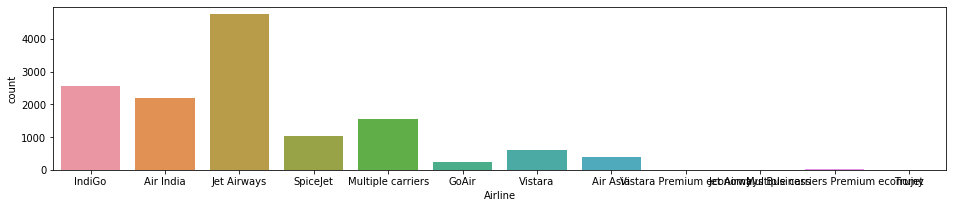

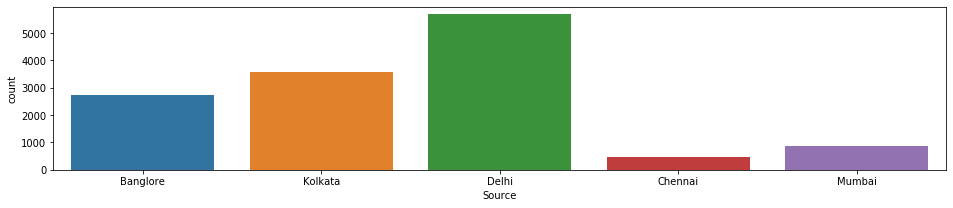

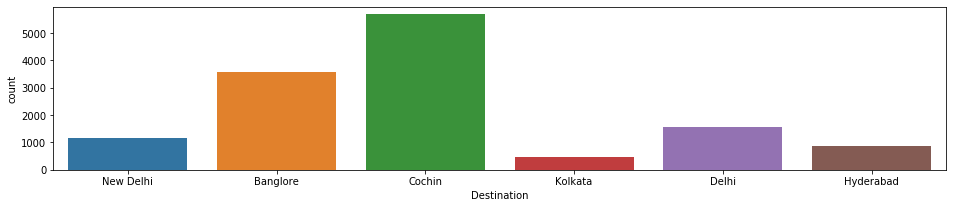

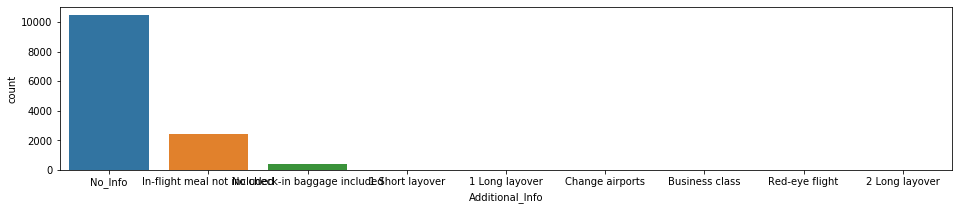

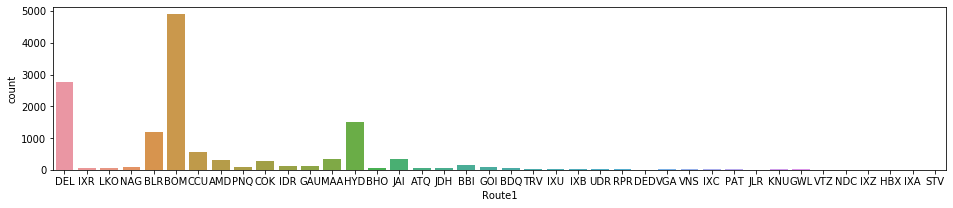

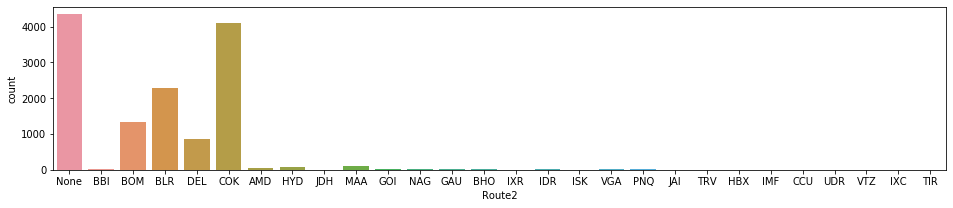

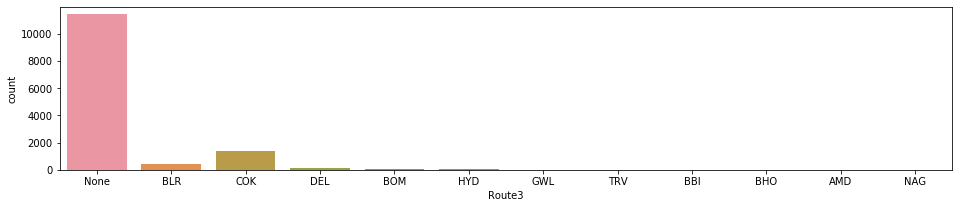

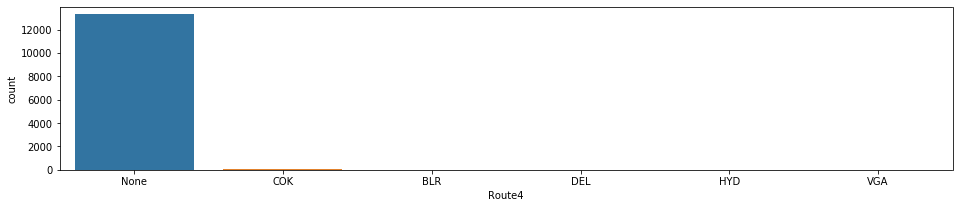

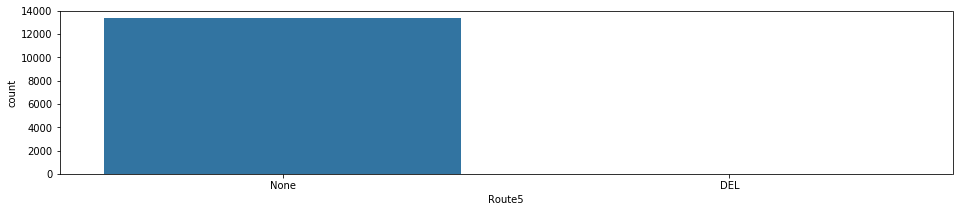

In [206]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

findings: 
    
    1)jet airways has max count
    2)delhi airport is crowded airport


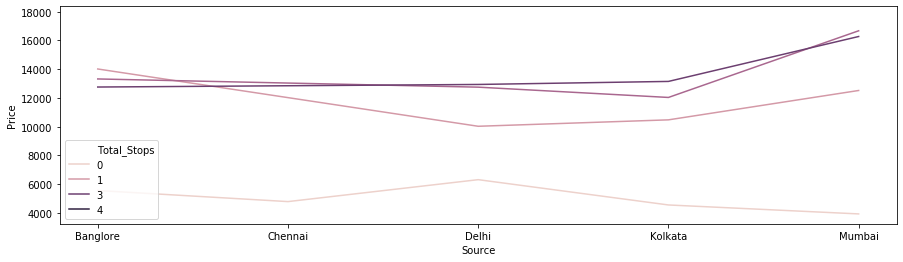

In [207]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Source',y='Price',hue='Total_Stops',data=df, ci=None)

Observation:

1. If Total stop is 0 than journey start from Delhi than ticket price is more than other sourses.
2. If total stops more than 1 than ticket price is more than other source.

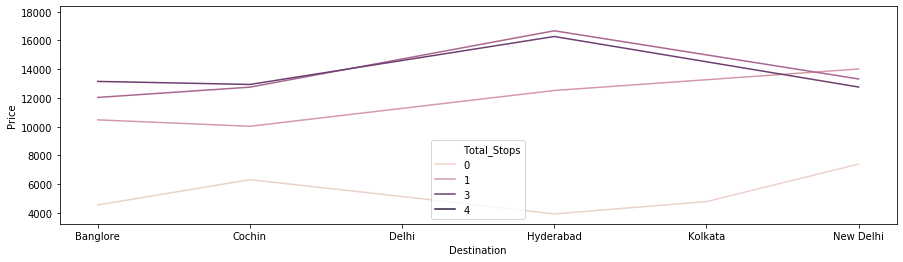

In [208]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Destination',y='Price',hue='Total_Stops',data=df, ci=None)

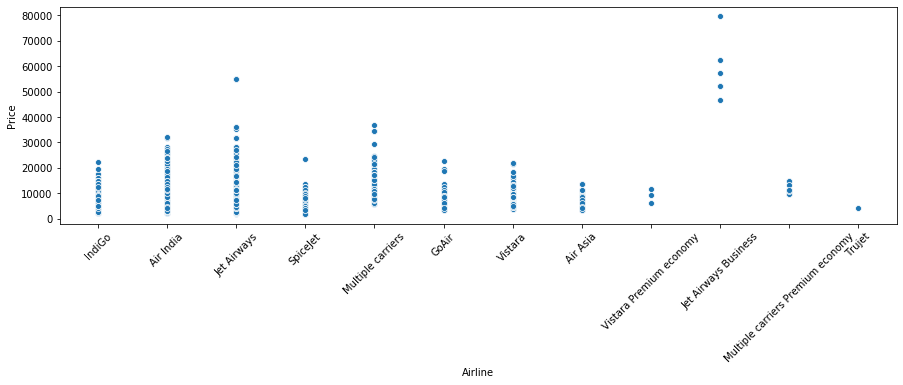

In [209]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.scatterplot(x='Airline',y='Price',data=df)

findings:
    
    1) jet airways bussiness is minimum count with higher price
    2) spicejet has minimum price

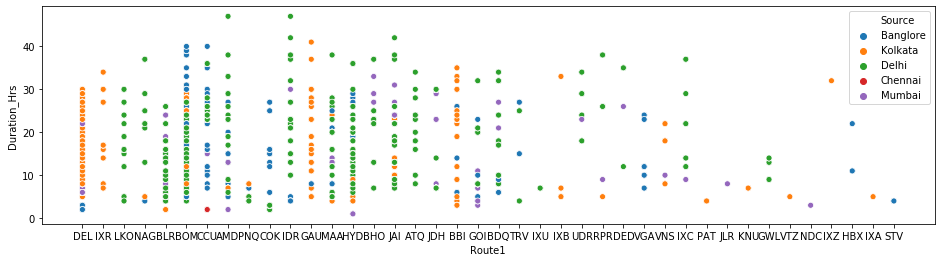

In [210]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Route1', y='Duration_Hrs', data=df, hue='Source')

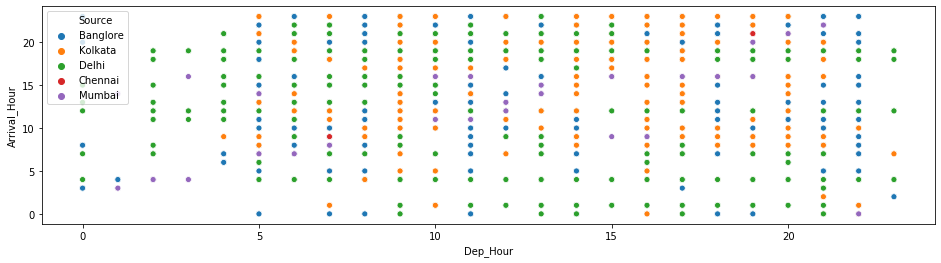

In [211]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Dep_Hour', y='Arrival_Hour', data=df, hue='Source')

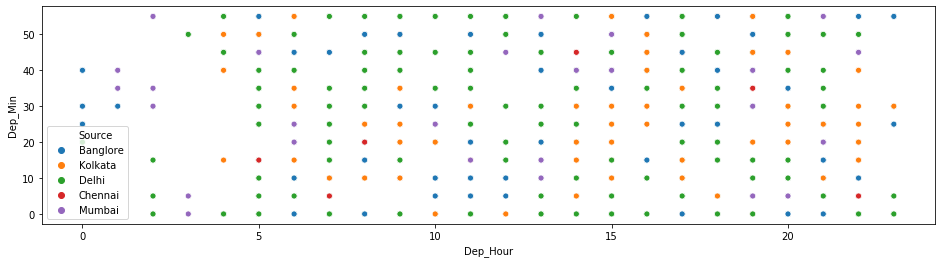

In [212]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Dep_Hour', y='Dep_Min', data=df, hue='Source')

Text(0, 0.5, '% of Stops')

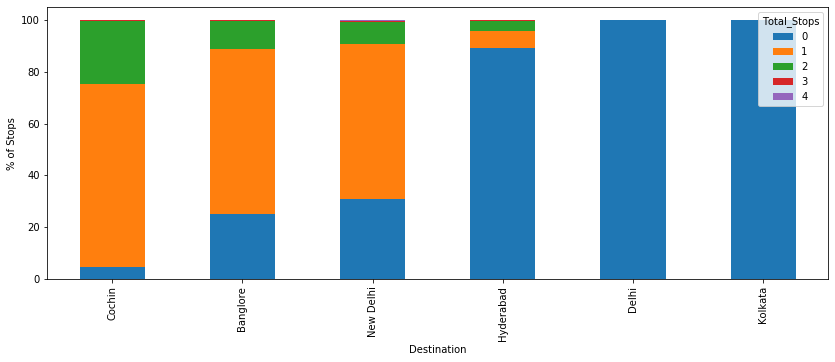

In [213]:
tbl=pd.crosstab(df['Destination'], df['Total_Stops'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('Destination')
plt.ylabel('% of Stops')

Observation:

1. For travelling to Cochin without stops not any flight from source.
2. Fo Delhi and kolkata more flight is available from sourse station without stop.

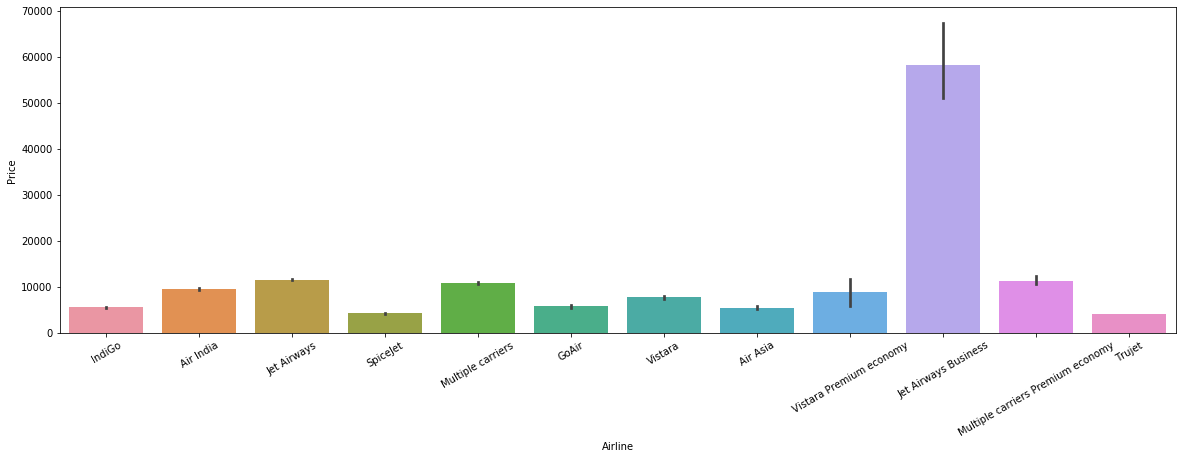

In [214]:
plt.figure(figsize=(20,6))
sns.barplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=30)
plt.show()


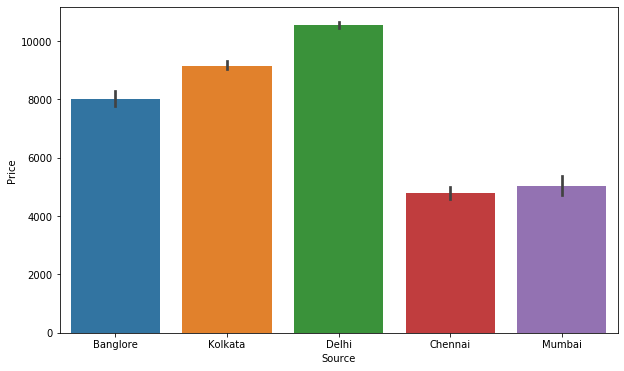

In [215]:
plt.figure(figsize=(10,6))
sns.barplot(x='Source', y='Price', data=df)
plt.xticks(rotation=0)
plt.show()

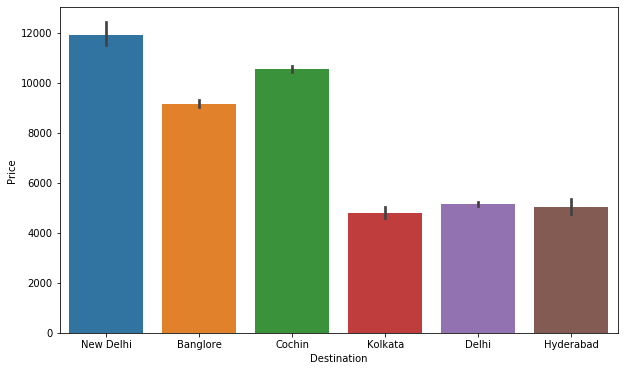

In [216]:
plt.figure(figsize=(10,6))
sns.barplot(x='Destination', y='Price', data=df)
plt.xticks(rotation=0)
plt.show()

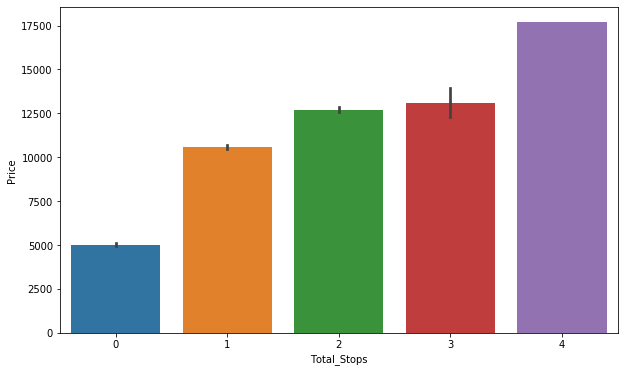

In [217]:
plt.figure(figsize=(10,6))
sns.barplot(x='Total_Stops', y='Price', data=df)
plt.xticks(rotation=0)
plt.show()

In [218]:
# Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [219]:
df.index = range(0,13351)
df[df['Price'].isna()].head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5,Duration_Hrs,Duration_Min
10681,4,2,1,1,7,NaN,3,2,4,5,17,6,6,6,10,4,1,9,11
10682,3,3,0,1,7,NaN,2,4,10,4,6,4,28,3,10,4,1,3,0
10683,4,2,1,1,5,NaN,2,7,19,0,19,3,6,6,10,4,1,22,9
10684,6,2,1,1,7,NaN,2,7,21,0,8,0,6,6,10,4,1,12,0
10685,0,0,2,0,7,NaN,3,8,2,9,23,11,10,21,10,4,1,1,10


In [220]:
#Splitting x and y
df_train = df[0:10681]
df_test = df[10681:].drop(columns=['Price'], axis=1)
x = df_train.drop(columns=['Price'], axis=1)
y = df_train['Price']

In [221]:
# Instantiate and scale the data
from sklearn.preprocessing import LabelEncoder, StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [222]:
# Instanstiate PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(10681, 10)

In [223]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [224]:
#Checking the shape
print(x_train.shape,x_test.shape)

(8544, 10) (2137, 10)


In [225]:
#Checking the shape
print(y_train.shape,y_test.shape)

(8544,) (2137,)


In [226]:
# Model Training and Validation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [227]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score, rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train, y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train, y_train)*100))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('>>> Error >>>')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [228]:
# Instantiate all models without using gridsearch cv for best parameters means call all model with deafault parameters
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [229]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf,
            'Gradient Boosting Regression': gbr,
            'AdaBoost Regression': abr
           }

In [230]:
score,rmse = [],[]
for i, j in all_models.items():
    print('-------------', i, '------------')
    models(j, x_train, x_test, y_train, y_test, score, rmse)

------------- Linear Regression ------------
Accuracy Score :: 43.48
R2 Score: 0.4673987970433001
>>> Error >>>
Mean Absolute Error: 2374.586532721971
Mean Squared Error: 11244149.300025102
Root Mean Squared Error: 3353.2296819670887
------------- K-Neighbors Regressor ------------
Accuracy Score :: 83.66
R2 Score: 0.8149846755766669
>>> Error >>>
Mean Absolute Error: 1159.734581188582
Mean Squared Error: 3905999.3087880206
Root Mean Squared Error: 1976.3601161701326
------------- Ridge Regression ------------
Accuracy Score :: 43.48
R2 Score: 0.4673965645208019
>>> Error >>>
Mean Absolute Error: 2374.59512823957
Mean Squared Error: 11244196.432506489
Root Mean Squared Error: 3353.2367098829286
------------- Lasso Regression ------------
Accuracy Score :: 43.48
R2 Score: 0.46737499851548125
>>> Error >>>
Mean Absolute Error: 2374.589843503917
Mean Squared Error: 11244651.728856336
Root Mean Squared Error: 3353.304598281572
------------- Elastic Net ------------
Accuracy Score :: 41.63


In [231]:
# Cross Validate All Algorithm by using for loop without parameters

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('-----------------------------------')

Model: LinearRegression()
Score: [ 0.46068541  0.40455653  0.39850558  0.50355075  0.50956512  0.41291652
  0.43130813  0.42838286 -1.18739409  0.40602952]
Mean Score: 0.27681063341107875
Standard deviation: 0.4895391466397421
-----------------------------------
Model: SVR()
Score: [0.08201342 0.06099777 0.04397305 0.08819746 0.10855931 0.0657041
 0.09248233 0.09704247 0.0758409  0.07127685]
Mean Score: 0.07860876438335013
Standard deviation: 0.018084733255072673
-----------------------------------
Model: DecisionTreeRegressor()
Score: [0.64724477 0.52547953 0.5611949  0.48416163 0.55042732 0.6759532
 0.58267383 0.64495672 0.53468467 0.57363482]
Mean Score: 0.5780411388906112
Standard deviation: 0.0577898558070417
-----------------------------------
Model: KNeighborsRegressor()
Score: [0.76690686 0.75653693 0.73185901 0.79732757 0.78191357 0.76300662
 0.77638971 0.81857999 0.7964854  0.7394818 ]
Mean Score: 0.772848745648001
Standard deviation: 0.025565055013531277
--------------------

In [232]:
#Using Random Forest Regressor maximum score achive by using default parameters
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Score: 0.9627116999254665
Mean absolute error: 1172.0091468439662
Mean squared error: 4468339.207280237
Root Mean Squared Error: 2113.84465069698
r2_score: 0.7883483424565763


In [233]:
#save best model
# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file
joblib.dump(rf,'Flight_Ticket_Price.csv')

['Flight_Ticket_Price.csv']

In [ ]:
#predict the price by using test dataset
price=rf.predict(df_test)
price